
<h1 style="text-align: center;">CIÊNCIA DE DADOS</h1>
<h1 style="text-align: center;">Roteiro de Atividade Prática</h1>
<br>
<br>

Nome: ______________________________________________________________________________________      

Turma: ______________


**Componente:** Matemática e Estatística para Ciência de Dados 
<br>
**Unidade Curricular:** Estatística Aplicada
<br>
**Tema da Semana:** Revisão Geral e Preparação para Avaliações

<br>


# NOTEBOOK DO PROFESSOR

### Aula 1

#### **Exercício 1: Comparando a média de vencimentos entre dois cargos**


Suponha que o departamento de Recursos Humanos da Trans Transportes deseje investigar se há uma diferença significativa de remuneração entre dois cargos específicos, por exemplo, “Motorista” e “tecnico de sistema de transporte jr”. Muitas vezes, há a percepção de que os motoristas recebem vencimentos médios mais altos devido à complexidade de suas funções, enquanto os cobradores poderiam ter um salário inicial menor. Porém, essas percepções precisam ser confirmadas ou refutadas com dados reais.

Com o dataset em mãos, podemos filtrar as linhas correspondentes a cada um desses cargos e calcular suas médias de vencimentos. Em seguida, aplicamos um teste de hipótese para duas amostras independentes (o famoso teste t). A hipótese nula (H0) é de que a média de vencimentos dos motoristas é igual à dos cobradores. A hipótese alternativa (H1) sugere que há uma diferença estatisticamente relevante entre elas, seja para cima ou para baixo (teste bicaudal). Se o p-valor for menor que 0.05, rejeitamos H0 e concluímos que existe diferença significativa. Essa informação pode orientar políticas internas de remuneração, ajustes salariais e até mesmo análises de mercado para garantir que a SPTrans ofereça uma remuneração condizente com cada função.

In [1]:
import pandas as pd
from scipy.stats import ttest_ind

# Leitura do dataset
df = pd.read_csv("trans_corrigido_final.csv")

# Filtra dados para dois cargos específicos
cargo_tec_sist_jr = df[df["CARGO"] == "tecnico de sistema de transporte jr"]["VENCIMENTOS"]
cargo_motorista = df[df["CARGO"] == "motorista"]["VENCIMENTOS"]

# Aplica o teste t para duas amostras independentes
# equal_var=False caso suspeitemos que as variâncias sejam diferentes
stat, p_value = ttest_ind(cargo_tec_sist_jr, cargo_motorista, equal_var=False)

print("Estatística do teste:", stat)
print("p-valor:", p_value)

if p_value < 0.05:
    print("Rejeitamos H0: há diferença significativa entre as médias.")
else:
    print("Não rejeitamos H0: não há evidência de diferença significativa.")

Estatística do teste: -0.11942548390094529
p-valor: 0.9049999488102523
Não rejeitamos H0: não há evidência de diferença significativa.


In [5]:
df.head(2)

,EMPRESA,MÊS,ANO,NOME,CARGO,LOTAÇÃO,ADMISSÃO,NASCIMENTO,VENCIMENTOS,ENCARGOS,BENEFÍCIOS,OUTRAS REMUNERAÇÕES,VÍNCULO,DETALHE VÍNCULO,LIMINAR,ARQUIVO ID
0,SPTRANS,1,2024,MATSUO WAKASSUQUI,tecnico de processos administrativos sr,DP/SCS-SUP CONTRATOS SISTEMA TRANSPORTE,1968-03-01,1905-05-06,26428.33,3830.09,3050.36,0.0,CLT: contrato por tempo indeterminado,Concursado NÃO ocupante de cargo em comissão,-,ad3779a0-5e93-4689-91d8-f0bb78101edf
1,SPTRANS,1,2024,VALDIR RAMOS DE JESUS,tecnico de inspeaao veicular sr,DO/SEM/GIA-GER INSPECAO E AUDIT TECNICA,1971-05-27,1905-05-05,13747.39,4262.76,3381.46,0.0,CLT: contrato por tempo indeterminado,Concursado NÃO ocupante de cargo em comissão,-,ad3779a0-5e93-4689-91d8-f0bb78101edf


In [9]:
df["EMPRESA"].value_counts()

EMPRESA
SPTRANS    19916
Name: count, dtype: int64

In [46]:
df.columns

Index(['EMPRESA', 'MÊS', 'ANO', 'NOME', 'CARGO', 'LOTAÇÃO', 'ADMISSÃO',
       'NASCIMENTO', 'VENCIMENTOS', 'ENCARGOS', 'BENEFÍCIOS',
       'OUTRAS REMUNERAÇÕES', 'VÍNCULO', 'DETALHE VÍNCULO', 'LIMINAR',
       'ARQUIVO ID'],
      dtype='object')

#### **Perguntas:**

1. Por que faz sentido comparar as médias de vencimentos entre dois cargos usando um teste de hipótese?
2. Qual é a interpretação de um p-valor abaixo de 0.05 no contexto deste teste?

<br>

**Respostas**

1. Porque queremos saber se a diferença observada nos salários médios desses cargos é estatisticamente relevante ou resultado de variações aleatórias nos dados.

2. Significa que as evidências encontradas nos dados sugerem, com 95% de confiança, que existe uma diferença real entre os salários médios de Motoristas e Cobradores.Perguntas

<br>

---


#### **Exercício 2: Análise exploratória e identificação de valores extremos em vencimentos**


Antes de aplicar testes de hipóteses, é essencial ter um panorama da distribuição dos vencimentos no dataset. Vencimentos muito altos ou muito baixos podem aparecer em determinados cargos de diretoria ou em contratos temporários, por exemplo. Esses valores extremos podem distorcer a média ou indicar casos especiais que merecem atenção, como gratificações únicas ou acúmulo de benefícios num único mês.

Para entender melhor esses possíveis outliers, podemos construir um boxplot dos vencimentos, agrupando os dados por cargo ou por empresa, de modo a visualizar a variação interna de cada grupo. Um boxplot mostra rapidamente a mediana, o intervalo interquartil (IQ) e quaisquer valores considerados fora do intervalo esperado. Caso surjam diversos pontos fora da “caixa” do boxplot, especialmente em funções específicas, pode ser necessário investigar se há motivos legítimos (cargos de alta gerência) ou se há algum problema de registro (erro nos dados). Essa análise exploratória também auxiliará na decisão de qual teste estatístico utilizar mais à frente e se alguma limpeza prévia no dataset é aconselhável antes de rodar modelos de inferência mais sofisticados.

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from curren

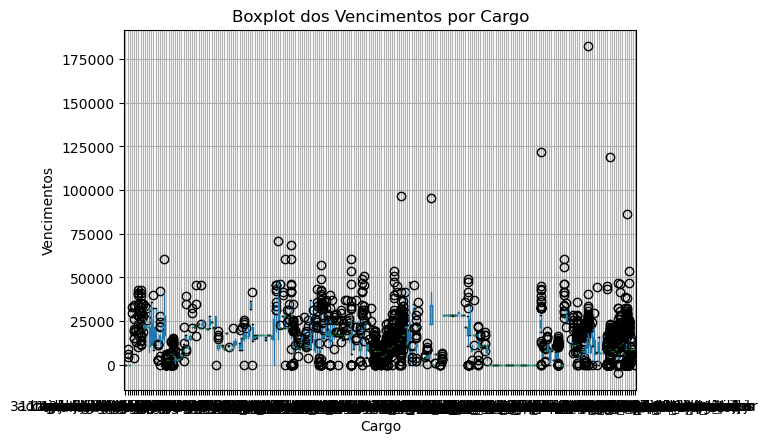

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo: boxplot dos vencimentos por cargo
df.boxplot(column="VENCIMENTOS", by="CARGO")
plt.title("Boxplot dos Vencimentos por Cargo")
plt.suptitle("")  # remover título automático
plt.xlabel("Cargo")
plt.ylabel("Vencimentos")
plt.show()


Como ficou ilegível, faremos dos 10 maiores cargos em termos de volume de pssoas contratadas.

<Figure size 1200x600 with 0 Axes>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


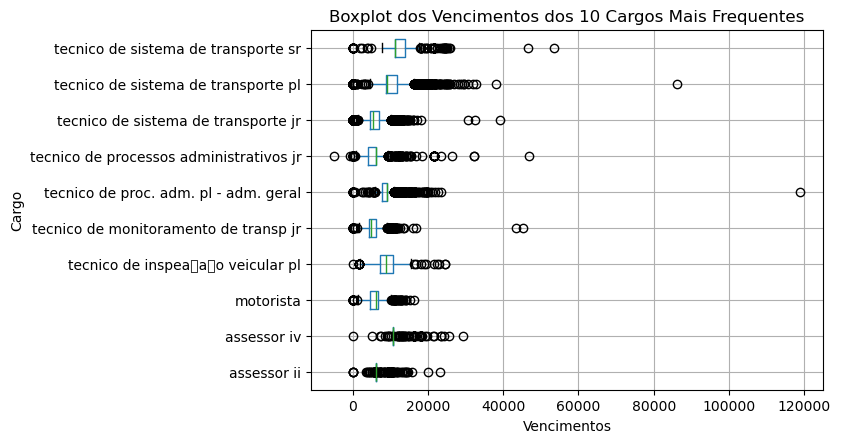

In [16]:
import matplotlib.pyplot as plt

# Selecionar os 10 cargos mais frequentes
top_cargos = df["CARGO"].value_counts().index[:10]

# Filtrar o DataFrame para conter apenas esses cargos
df_top_cargos = df[df["CARGO"].isin(top_cargos)]

# Criar o boxplot dos vencimentos por cargo
plt.figure(figsize=(12, 6))
df_top_cargos.boxplot(column="VENCIMENTOS", by="CARGO", vert=False)
plt.title("Boxplot dos Vencimentos dos 10 Cargos Mais Frequentes")
plt.suptitle("")  # Remover título automático gerado pelo Pandas
plt.xlabel("Vencimentos")
plt.ylabel("Cargo")
plt.show()


#### **Perguntas:**

1. Por que é importante identificar valores atípicos em um conjunto de dados de folha de pagamento?
2. Como o boxplot ajuda a destacar possíveis inconsistências ou casos especiais de remuneração?

**Respostas**

1. Valores atípicos podem indicar problemas de dados (lançamento incorreto) ou, se forem válidos, representar exceções como gratificações extraordinárias. Entendê-los evita conclusões estatísticas equivocadas.
2. O boxplot exibe, de forma visual, a dispersão dos dados e sinaliza pontos fora do intervalo interquartil, ressaltando possíveis outliers que merecem investigação detalhada.Perguntas



<br>

---

#### **Exercício 3: Testando a proporção de funcionários com “ENCARGOS” acima de um valor específico**


A SPTrans pode estabelecer uma métrica de acompanhamento dos encargos trabalhistas para cada funcionário. Imagine que exista uma preocupação de que 40% (ou mais) dos colaboradores estão gerando encargos acima de R$2.000,00 mensais, o que sobrecarregaria o orçamento destinado ao pagamento de tributos e contribuições. Para verificar essa suposição, podemos realizar um teste de proporção.

A hipótese nula (H0) seria de que a proporção de funcionários com encargos acima desse valor não excede 40%. A hipótese alternativa (H1) é de que, na realidade, essa fração seja maior. Nesse tipo de teste, classificamos cada funcionário em “Sim, encargos acima de 2.000” ou “Não, encargos até 2.000”. Em seguida, calculamos a proporção de “Sim” e comparamos ao valor de referência de 0,40. Se os dados indicarem que a proporção real é significativamente maior, a SPTrans precisará rever aspectos como negociações sindicais, revisões de benefícios vinculados e até a forma de contratação, pois esse excedente pode comprometer parte do orçamento planejado. Se, por outro lado, a proporção estiver dentro do esperado, significa que os gastos com encargos ainda são condizentes com as previsões iniciais.

In [27]:
import pandas as pd
from math import sqrt

df["enc_acima_2000"] = df["ENCARGOS"] > 2000
p_amostral = df["enc_acima_2000"].mean()
n = len(df)

p0 = 0.40  # H0: proporção = 40%
z = (p_amostral - p0) / sqrt((p0*(1-p0))/n)

print("Proporção amostral:", round(p_amostral, 3))
print("Estatística Z (aproximada):", round(z, 4))

if z > 1.645:  # Teste unilateral ao nível ~5% (Z crítico ~1.645)
    print("Rejeitamos H0: proporção > 40%.")
else:
    print("Não rejeitamos H0: sem evidência forte de proporção > 40%.")


Proporção amostral: 0.617
Estatística Z (aproximada): 62.5228
Rejeitamos H0: proporção > 40%.


#### **Perguntas:**


1. Por que um teste unilateral é adequado neste caso?
2. Como interpretar a rejeição da hipótese nula neste contexto?

**Respostas**

1. Porque a suspeita específica é de que a proporção exceda um determinado valor (0,40), não apenas que seja diferente (maior ou menor).
1. Significa que há evidências de que a proporção de funcionários com encargos acima de R$2.000,00 é maior do que 40%, exigindo atenção da gestão.Perguntas

<br>

---

#### **Exercício 4: Correlação entre “VENCIMENTOS” e “OUTRAS REMUNERAÇÕES”**

Algumas vezes, fora o valor fixo do salário, há componentes adicionais como gratificações, horas extras ou pagamentos eventuais, representados na coluna “OUTRAS REMUNERAÇÕES”. Uma dúvida comum é: esses adicionais crescem na mesma proporção que os vencimentos básicos? Ou seja, funcionários com salários maiores também costumam ter “OUTRAS REMUNERAÇÕES” elevadas? Se sim, a correlação entre as duas variáveis deve ser alta e positiva.

Ao analisar essa correlação, conseguimos uma pista sobre a política remuneratória da empresa. Caso haja correlação próxima de zero, significa que essas remunerações extras não estão diretamente associadas aos vencimentos fixos, podendo depender de outros fatores, como participações em projetos específicos ou características do cargo. Já uma correlação alta indicaria que quem ganha mais também recebe mais complementos, o que pode reforçar uma desigualdade ou uma estrutura que privilegie cargos de alto escalão com benefícios extras. No entanto, sempre lembramos que correlação não implica causalidade. Não podemos afirmar que o vencimento maior cause outras remunerações maiores, apenas que ambas variam em conjunto. Esse tipo de insight, porém, auxilia o RH e a controladoria no entendimento de como a folha salarial se comporta e onde há maior concentração de gastos extras.

In [33]:
import pandas as pd

corr_valor = df["VENCIMENTOS"].corr(df["OUTRAS REMUNERAÇÕES"])
print("Correlação entre VENCIMENTOS e OUTRAS REMUNERAÇÕES:", corr_valor)

Correlação entre VENCIMENTOS e OUTRAS REMUNERAÇÕES: 0.08456240192890942


#### **Perguntas:**


1. O que significa uma correlação próxima de +1 entre as duas variáveis?
2. Por que uma correlação próxima de zero não implica necessariamente que não haja relação alguma?

**Respostas**

1. Indica uma forte associação linear positiva, ou seja, à medida que os vencimentos aumentam, as outras remunerações tendem a aumentar proporcionalmente.
2. Correlação mede apenas relações lineares. Pode haver relação não linear ou existir fatores que ofusquem esse vínculo.Perguntas

<br>

---

### Aula 2

#### **Exercício 1: Comparando a média de ENCARGOS entre “assessor ii” e “assessor v”**

Desta vez, você quer verificar se dois cargos distintos – “assessor ii” e “assessor v” – têm médias de encargos diferentes. O “assessor ii” lida com atividades externas, visitas a terminais, contato direto com ocorrências de transporte, enquanto o “assessor v” atua em ambiente de escritório. Em tese, o primeiro poderia acarretar mais adicionais de periculosidade ou seguros, refletindo encargos mais altos.

Formulamos as hipóteses:

- H0: A média de encargos para “assessor ii” = média de encargos para “assessor v”.
- H1: Essas médias de encargos diferem significativamente entre os dois cargos.

Se a análise mostrar que “assessor v” têm encargos mais elevados, possivelmente será preciso prever um orçamento maior para essas posições e avaliar se as políticas de segurança e seguros estão ajustadas. Caso não haja diferença estatística, a SPTrans pode interpretar que a variação de encargos não está ligada à natureza do trabalho (campo vs. escritório), mas talvez a outros fatores, como tempo de serviço ou data de admissão. Esse resultado servirá de base para reflexões sobre regras contratuais e eventuais ajustes em próximos acordos sindicais ou negociações de seguro coletivo.

In [62]:
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_csv("sptrans_corrigido_final.csv")
pd.set_option("display.max_rows", None)

In [64]:
df["CARGO"].value_counts()

CARGO
tecnico de sistema de transporte jr           3788
tecnico de sistema de transporte pl           3229
tecnico de monitoramento de transp jr         1532
tecnico de processos administrativos jr       1031
tecnico de proc. adm. pl - adm. geral          984
tecnico de sistema de transporte sr            374
motorista                                      352
tecnico de inspeaao veicular pl              327
assessor ii                                    325
assessor iv                                    287
assessor v                                     282
tecnico de processos administrativos sr        266
assessor vi                                    253
assessor iii                                   252
analista de gestao pl - adm. geral            246
analista de gestao sr - adm. geral            240
agente de informaaaes                        235
assessor assistente ii                         223
tecnico de desenvolv administrativo            222
tecnico de inspeaao vei

In [66]:
agentes = df[df["CARGO"] == "assessor ii"]["ENCARGOS"].dropna()
assistentes = df[df["CARGO"] == "assessor v"]["ENCARGOS"].dropna()

stat, p_value = ttest_ind(agentes, assistentes, equal_var=False)

print("Estatística do teste:", stat)
print("p-valor:", p_value)
if p_value < 0.05:
    print("Rejeitamos H0: diferença significativa na média de ENCARGOS entre os dois cargos.")
else:
    print("Não rejeitamos H0: não há evidência de diferença estatística.")

Estatística do teste: -44.453208699064895
p-valor: 3.639656857385037e-188
Rejeitamos H0: diferença significativa na média de ENCARGOS entre os dois cargos.


#### **Perguntas:**


1. Por que faz sentido analisar ENCARGOS em vez de apenas VENCIMENTOS ao comparar esses cargos?
2. Como as conclusões podem influenciar a previsão orçamentária da empresa?

**Gabarito**

1. Porque encargos podem incluir adicionais que refletem riscos ou obrigações legais distintos, algo muito relevante para cargos de campo.
2. Se os encargos de “Agente de Campo” forem efetivamente maiores, o RH e a área financeira saberão que esse cargo demanda maior aporte de recursos.Perguntas de reflexão

<br>

---

#### **Exemplo 2: TComparando “BENEFÍCIOS” entre dois vínculos distintos** 

Na SPTrans, existem várias formas de vínculo empregatício, como CLT (Consolidação das Leis do Trabalho) e Contrato Temporário, entre outras possíveis. Suponha que você queira investigar se há diferença significativa na média de “BENEFÍCIOS” entre dois vínculos específicos, por exemplo, “CLT” e “Estagiário”. Muitas vezes, empregados CLT têm direitos trabalhistas e benefícios previstos por lei, enquanto estagiários recebem apenas ajudas de custo.

Formulamos as hipóteses:

- H0: A média de BENEFÍCIOS é igual para “CLT” e “Estagiário”.
- H1: A média de BENEFÍCIOS difere entre os dois vínculos.

Se rejeitarmos H0, pode ficar comprovado estatisticamente que os valores de benefícios são mais elevados (ou diferentes) para quem tem carteira assinada em comparação aos estagiários, possivelmente justificando as reclamações de alguns estudantes que se sentem desassistidos. Por outro lado, se não houver evidência de diferença, conclui-se que, mesmo com regimes de contratação diversos, a SPTrans manteve um patamar de benefícios parecido. Esse achado pode interessar à equipe de RH que gerencia custos e políticas de retenção, garantindo uma experiência justa e compatível com as regras vigentes para cada tipo de vínculo.

In [72]:
df.head(2)

,EMPRESA,MÊS,ANO,NOME,CARGO,LOTAÇÃO,ADMISSÃO,NASCIMENTO,VENCIMENTOS,ENCARGOS,BENEFÍCIOS,OUTRAS REMUNERAÇÕES,VÍNCULO,DETALHE VÍNCULO,LIMINAR,ARQUIVO ID
0,SPTRANS,1,2024,MATSUO WAKASSUQUI,tecnico de processos administrativos sr,DP/SCS-SUP CONTRATOS SISTEMA TRANSPORTE,1968-03-01,1905-05-06,26428.33,3830.09,3050.36,0.0,CLT: contrato por tempo indeterminado,Concursado NÃO ocupante de cargo em comissão,-,ad3779a0-5e93-4689-91d8-f0bb78101edf
1,SPTRANS,1,2024,VALDIR RAMOS DE JESUS,tecnico de inspeaao veicular sr,DO/SEM/GIA-GER INSPECAO E AUDIT TECNICA,1971-05-27,1905-05-05,13747.39,4262.76,3381.46,0.0,CLT: contrato por tempo indeterminado,Concursado NÃO ocupante de cargo em comissão,-,ad3779a0-5e93-4689-91d8-f0bb78101edf


In [74]:
df["VÍNCULO"].value_counts()

VÍNCULO
CLT: contrato por tempo indeterminado                                 18878
Estagiário                                                              597
Desligado                                                               185
Estatutário: conselho administrativo (estatuto social)                   92
Estatutário: diretor (estatuto social)                                   66
Estatutário: conselho fiscal (estatuto social)                           43
Estatutário: comitê de auditoria estatutária                             33
Servidor público cedido por outro ente: Servidor Público Municipal       22
Name: count, dtype: int64

In [78]:
benef_clt = df[df["VÍNCULO"] == "CLT: contrato por tempo indeterminado"]["BENEFÍCIOS"].dropna()
benef_estagio = df[df["VÍNCULO"] == "Estagiário"]["BENEFÍCIOS"].dropna()

stat, p_value = ttest_ind(benef_clt, benef_estagio, equal_var=False)

print("Estatística do teste:", stat)
print("p-valor:", p_value)
if p_value < 0.05:
    print("Rejeitamos H0: há diferença significativa nos benefícios.")
else:
    print("Não rejeitamos H0: sem evidência de diferença estatística.")

Estatística do teste: 282.88594748823954
p-valor: 0.0
Rejeitamos H0: há diferença significativa nos benefícios.


#### **Perguntas:**


1. Em termos práticos, o que significaria verificar que há diferença de benefícios entre CLT e Estagiário?
2. Por que é relevante observar o p-valor ao comparar esses grupos?

**Gabarito**

1. Significa que um dos grupos pode estar recebendo pacotes de benefícios claramente distintos, implicando potenciais ajustes para equidade ou revisão de políticas internas.
2. O p-valor indica se as diferenças observadas podem ser atribuídas ao acaso; se for muito baixo (<0.05), rejeitamos H0 e concluímos pela diferença.

<br>

---

#### **Exemplo 3: Comparando a média de “VENCIMENTOS” entre funcionários admitidos antes e depois de 2015**

Suponha que a SPTrans deseje investigar se houve mudanças importantes nos valores de “VENCIMENTOS” para os funcionários contratados em períodos diferentes. Alguns gestores acreditam que, a partir de 2015, ocorreram ajustes salariais maiores, além de novas regras de contratação que elevaram a remuneração média. Já para quem foi admitido antes de 2015, a impressão é de que houve menos reajustes e, por isso, os salários se mantiveram menores. Entretanto, é preciso verificar se esses comentários têm embasamento nos dados.

Para isso, podemos criar dois grupos de acordo com o ano de admissão: “Antes de 2015” e “2015 ou depois”. Em seguida, aplicamos um teste de hipóteses para comparar as médias de “VENCIMENTOS” entre esses dois grupos. 
Definimos nossas hipóteses:

- H0: A média de vencimentos é a mesma em ambos os grupos (funcionários admitidos antes de 2015 vs. em ou após 2015).
- H1: A média de vencimentos difere de forma significativa entre os dois grupos.

Se, ao final, rejeitarmos H0, há evidências de que os funcionários contratados depois de 2015 realmente possuem uma média salarial diferente. Isso pode influenciar a gestão de pessoas e a negociação sindical, pois, caso haja variação muito grande, poderá surgir a necessidade de revisar os planos de carreira ou de criar políticas de equiparação para funcionários mais antigos. Por outro lado, se os dados não indicarem diferença estatisticamente relevante, conclui-se que as variações salariais percebidas não passaram de especulações ou foram pequenas demais para caracterizar uma distinção consistente.

In [82]:
# Converter datas de admissão para datetime (ajustar formato conforme necessário)
df["ADMISSÃO"] = pd.to_datetime(df["ADMISSÃO"], errors='coerce', dayfirst=True)

# Separar grupos: antes de 2015 e em/apos 2015
antes_2015 = df[df["ADMISSÃO"].dt.year < 2015]["VENCIMENTOS"].dropna()
apos_2015 = df[df["ADMISSÃO"].dt.year >= 2015]["VENCIMENTOS"].dropna()

# Teste t para comparar as duas médias
stat, p_value = ttest_ind(antes_2015, apos_2015, equal_var=False)

print("Estatística do teste:", stat)
print("p-valor:", p_value)

if p_value < 0.05:
    print("Rejeitamos H0: diferença significativa de vencimentos entre os grupos.")
else:
    print("Não rejeitamos H0: não há evidência de diferença estatística.")


Estatística do teste: 17.049730230065336
p-valor: 1.298070433719824e-63
Rejeitamos H0: diferença significativa de vencimentos entre os grupos.


#### **Perguntas:**


1. Por que faz sentido segmentar os funcionários com base em datas de admissão para analisar “VENCIMENTOS”?
2. Como os resultados deste teste podem impactar políticas de equiparação salarial na SPTrans?

**Gabarito**

1. Porque mudanças de legislação, acordos coletivos ou ajustes internos podem ter sido implementados após certo período, afetando quem foi contratado em datas distintas.
2. Caso se confirme um aumento significativo para o grupo mais recente, pode haver pressões internas para revisar faixas salariais dos antigos, buscando maior equilíbrio entre colaboradores.
<br>

---

### Aula 3

#### Aula 3 – Revisão Geral e Preparação para Avaliações  


#### Roteiro para Montar e Apresentar o Projeto

A partir dos exercícios resolvidos nas aulas 1 e 2 (disponíveis no arquivo Python anexo), vocês deverão montar um projeto que integre as análises realizadas e responda a uma questão prática sobre o dataset de folha de pagamento da SPTrans. Este roteiro servirá de guia e inspiração. Responda às perguntas e siga os passos abaixo:

#### **1. Definição do Problema e Objetivo do Projeto**

- **Pergunta para reflexão:**  
  - *Qual questão relevante sobre folha de pagamento você deseja responder?*  
    - Exemplo: "Os vencimentos dos funcionários variam significativamente entre diferentes cargos ou períodos de admissão?"
- **Passos:**  
  1. **Escolha um tema:** Revise os exercícios anteriores e identifique um aspecto que você julgue interessante (por exemplo, comparação de vencimentos entre grupos, análise de encargos ou correlação entre vencimentos e outras remunerações).  
  2. **Defina as hipóteses:**  
     - **H0 (Hipótese nula):** Não existe diferença significativa (ou não há correlação, conforme o caso) entre os grupos analisados.  
     - **H1 (Hipótese alternativa):** Existe uma diferença significativa (ou correlação relevante) entre os grupos.
- **Dica:** Anote o problema e as hipóteses que serão respondidas com a análise dos dados.

#### **2. Planejamento e Metodologia**

- **Pergunta para reflexão:**  
  - *Como os exercícios resolvidos podem ser integrados para responder à sua questão?*  
    - Exemplo: "Podemos combinar a análise de vencimentos com a comparação de benefícios para entender a estrutura remuneratória."
- **Passos:**  
  1. **Reúna os exercícios:** Selecione os exercícios que melhor abordam seu problema. Por exemplo, use o exercício que compara vencimentos entre funcionários admitidos antes e depois de 2015 e o que analisa a correlação entre vencimentos e outras remunerações.  
  2. **Descreva a metodologia:** Explique brevemente como cada exercício contribui para a resposta da questão.  
  3. **Limpeza e preparação dos dados:** Lembre-se de explicar como os dados foram filtrados (remoção de nulos, definição de grupos, etc.) conforme os exemplos do arquivo Python.

#### **3. Análise e Interpretação dos Resultados**

- **Pergunta para reflexão:**  
  - *Quais resultados você espera encontrar e como eles podem influenciar decisões na SPTrans?*  
    - Exemplo: "Se os vencimentos aumentaram para funcionários admitidos após 2015, isso pode sugerir mudanças na política de remuneração."
- **Passos:**  
  1. **Apresente os resultados:** Utilize gráficos, tabelas ou estatísticas obtidas nos exercícios.  
  2. **Interprete os dados:** Explique se os resultados corroboram ou refutam suas hipóteses e discuta as possíveis implicações práticas.

#### **4. Preparação da Apresentação de 5 Minutos**

- **Pergunta para reflexão:**  
  - *Como você pode estruturar sua apresentação para ser clara e impactante em apenas 5 minutos?*  
    - Exemplo: "Dividindo a apresentação em introdução, metodologia, resultados e conclusões."
- **Passos:**  
  1. **Slide 1 – Introdução (1 minuto):**  
     - Apresente o problema, os objetivos e as hipóteses.
  2. **Slide 2 – Metodologia (1-2 minutos):**  
     - Explique de forma resumida os métodos e os testes aplicados (por exemplo, testes t, análise de correlação, etc.).  
  3. **Slide 3 – Resultados (1-2 minutos):**  
     - Mostre gráficos ou tabelas que evidenciem os principais achados.
  4. **Slide 4 – Conclusão e Recomendações (1 minuto):**  
     - Resuma as conclusões, discuta as implicações e sugira possíveis próximos passos ou recomendações.
  5. **Ensaiem a apresentação:** Pratiquem para garantir que o tempo total seja de 5 minutos, focando nos pontos mais importantes.

---

#### Gabarito para o Roteiro

1. **Definição do Problema:**  
   - Exemplo de problema: "Existe diferença significativa nos vencimentos entre funcionários admitidos antes e depois de 2015?"  
   - Hipóteses:  
     - H0: Não há diferença significativa.  
     - H1: Há diferença significativa.

2. **Planejamento e Metodologia:**  
   - Integre os exercícios que comparam vencimentos, analisam encargos e investigam correlações.  
   - Justifique a escolha dos métodos (por exemplo, teste t para comparação de médias, análise de correlação para entender relações).

3. **Análise e Interpretação:**  
   - Organize os resultados em um relatório resumido.  
   - Discuta como os dados podem indicar ajustes na política de remuneração ou na gestão de benefícios.

4. **Apresentação de 5 Minutos:**  
   - Estruture sua apresentação em 3 a 4 slides, abordando:  
     - Introdução e problema  
     - Metodologia e dados  
     - Resultados e conclusões  
   - Pratique para manter a clareza e o foco durante os 5 minutos.

---

#### Dicas para a Apresentação de 5 Minutos

- **Seja Claro e Conciso:** Utilize uma linguagem simples e direta, evitando jargões técnicos sem explicação.  
- **Utilize Elementos Visuais:** Gráficos e tabelas facilitam a compreensão e tornam a apresentação mais dinâmica.  
- **Divida o Tempo:** Planeje aproximadamente 1 minuto para a introdução, 2 minutos para a metodologia e resultados, e 1-2 minutos para conclusões e recomendações.  
- **Ensaie a Apresentação:** Treine a apresentação para garantir que ela se encaixe no tempo e que você se sinta seguro para responder eventuais dúvidas.

---

